------ Loading Boston Houses Dataset ------
Loaded...
Total data points: 506
Feature count: 13
Random parameters, w: [-0.49074518  3.78698647  0.80609728  0.01085905  1.72678485  0.22271847
 -0.17176151  0.95763797 -0.33735292  1.26184653 -0.61102523  1.15478951
 -0.15740657]
-------------------------------------------



cosine: 0.999999748093
squared distance: 4838.72717277


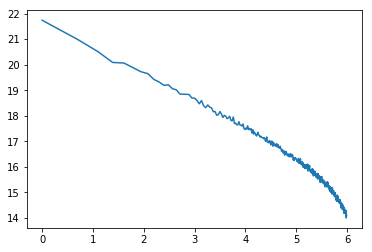

In [5]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

BATCHES = 50

# Answer for:  Mini-batch SGD Gradient Estimator
# http://www.cs.toronto.edu/~jlucas/teaching/csc411/hw/assignment1/hw1.pdf

class BatchSampler(object):
    '''
    A (very) simple wrapper to randomly sample batches without replacement.

    You shouldn't need to touch this.
    '''
    
    def __init__(self, data, targets, batch_size):
        self.num_points = data.shape[0]
        self.features = data.shape[1]
        self.batch_size = batch_size

        self.data = data
        self.targets = targets
        self.indices = np.arange(self.num_points)

    def random_batch_indices(self, m=None):
        '''
        Get random batch indices without replacement from the dataset.

        If m is given the batch will be of size m. Otherwise will default to the class initialized value.
        '''
        if m is None:
            indices = np.random.choice(self.indices, self.batch_size, replace=False)
        else:
            indices = np.random.choice(self.indices, m, replace=False)
        return indices 

    def get_batch(self, m=None):
        '''
        Get a random batch without replacement from the dataset.

        If m is given the batch will be of size m. Otherwise will default to the class initialized value.
        '''
        indices = self.random_batch_indices(m)
        X_batch = np.take(self.data, indices, 0)
        y_batch = self.targets[indices]
        return X_batch, y_batch    


def load_data_and_init_params():
    '''
    Load the Boston houses dataset and randomly initialise linear regression weights.
    '''
    print('------ Loading Boston Houses Dataset ------')
    X, y = load_boston(True)
    features = X.shape[1]

    # Initialize w
    w = np.random.randn(features)

    print("Loaded...")
    print("Total data points: {0}\nFeature count: {1}".format(X.shape[0], X.shape[1]))
    print("Random parameters, w: {0}".format(w))
    print('-------------------------------------------\n\n\n')

    return X, y, w


def cosine_similarity(vec1, vec2):
    '''
    Compute the cosine similarity (cos theta) between two vectors.
    '''
    dot = np.dot(vec1, vec2)
    sum1 = np.sqrt(np.dot(vec1, vec1))
    sum2 = np.sqrt(np.dot(vec2, vec2))

    return dot / (sum1 * sum2)

def lin_reg_gradient(X, y, w):
    '''
    Compute gradient of linear regression model parameterized by w
    '''
    return (-2*np.dot(y, X) + 2*np.dot(np.dot(X.T,X), w))/X.shape[0]

def main():

    # Load data and randomly initialise weights
    X, y, w = load_data_and_init_params()
    # Create a batch sampler to generate random batches from data
    batch_sampler = BatchSampler(X, y, BATCHES)

    #    True gradient
    #     X_b, y_b = batch_sampler.get_batch(BATCHES)
    true_gradient = lin_reg_gradient(X, y, w)

    #     Mini-batch gradient computation
    K = 500
    M = 50
    k_mini_batches_gradient_sum = 0

    for k in range(K):
        
        X_c, y_c = batch_sampler.get_batch(BATCHES)
        k_mini_batches_gradient_sum += lin_reg_gradient(X_c, y_c, w)
        
    mini_batch_gradient = k_mini_batches_gradient_sum/K
    
    print("cosine: {0}".format(cosine_similarity(true_gradient, mini_batch_gradient)))
    print("squared distance: {0}".format(np.sqrt(np.sum(np.square(true_gradient-mini_batch_gradient)))))

    #     Log variance computation
    increasing_M = 400
    k_by_m = [] 
    
    for k in range(K):
        
        kth_batches = []
        
        for m in range(1, increasing_M):
            
            X_d, y_d = batch_sampler.get_batch(m)
            kth_batches.append(lin_reg_gradient(X_d, y_d, w)[1])
            
        k_by_m.append(kth_batches)
        
    k_by_m = np.array(k_by_m)
    k_means = np.mean(k_by_m, axis=0)
    variances = (((k_by_m - k_means)**2).sum(axis=0)).T/K
    log_variances = np.log(variances)
    
    plt.plot(np.log(xrange(1,increasing_M)),log_variances)
    plt.show()
    
if __name__ == '__main__':
    main()